In [3]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘forecast’

The following object is masked from ‘package:ggpubr’:

    gghistogram

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

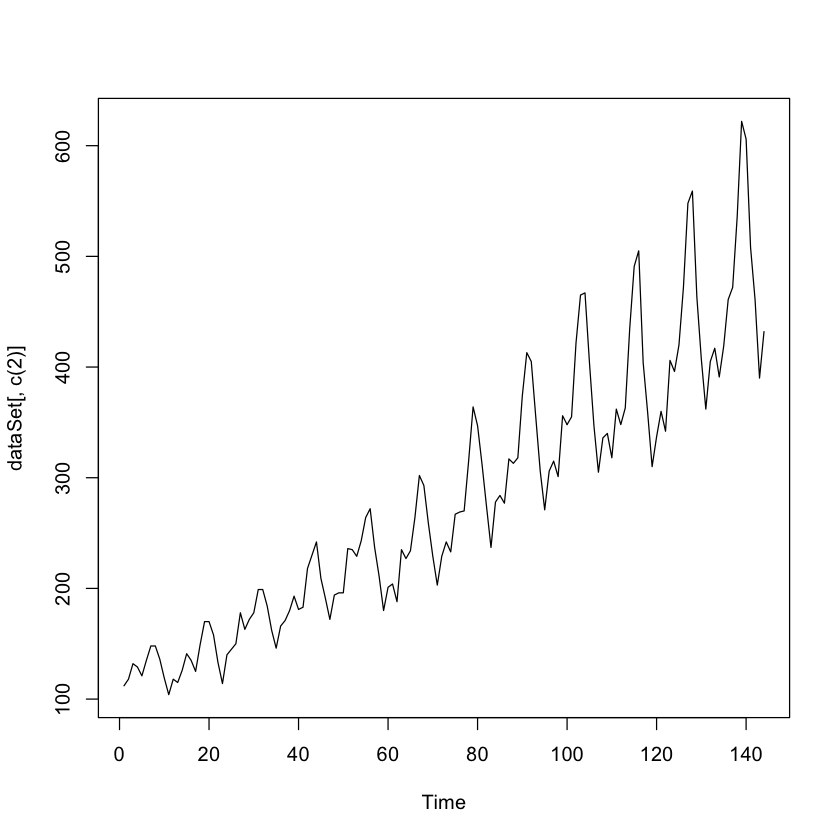

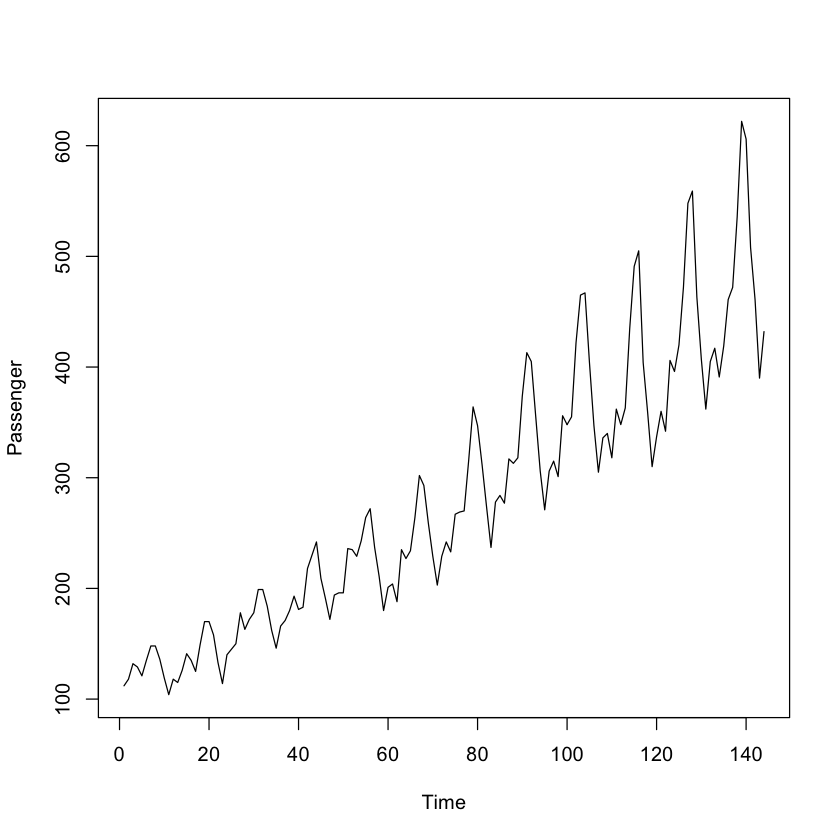

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 31.037, df = 9, p-value = 0.0002917

Model df: 1.   Total lags used: 10

[1] 0.9332019


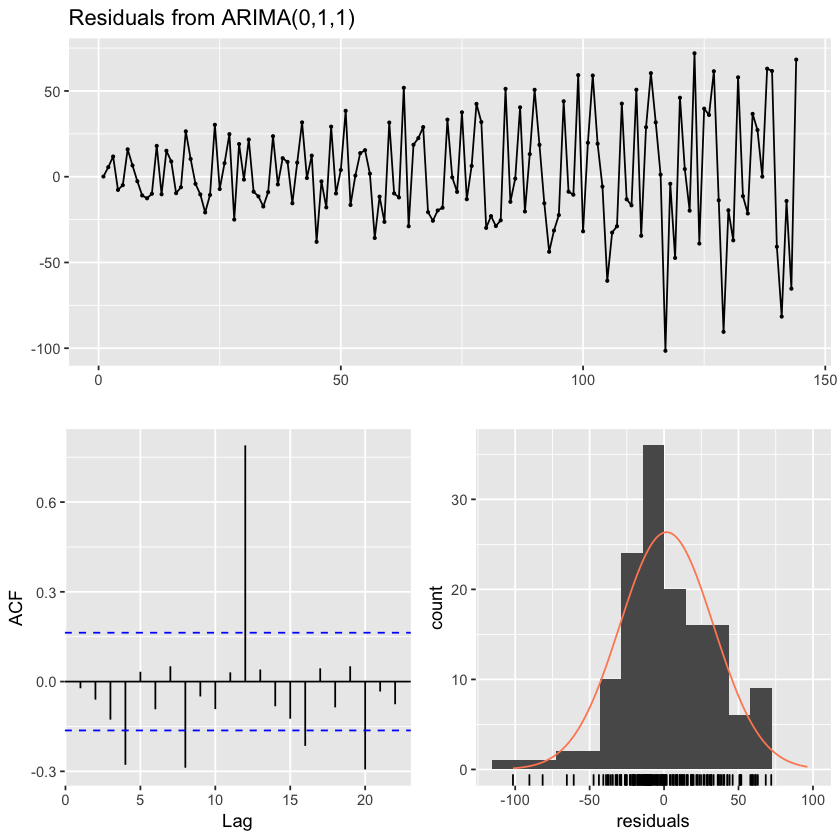

    Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
145       459.5047 419.0556 499.9538 397.64313 521.3663
146       459.5047 389.8239 529.1856 352.93709 566.0724
147       459.5047 369.6454 549.3641 322.07668 596.9328
148       459.5047 353.2315 565.7779 296.97389 622.0356
149       459.5047 339.0337 579.9758 275.26012 643.7493
150       459.5047 326.3410 592.6684 255.84845 663.1610
151       459.5047 314.7572 604.2523 238.13245 680.8770
152       459.5047 304.0340 614.9754 221.73280 697.2767
153       459.5047 294.0042 625.0053 206.39350 712.6160
154       459.5047 284.5484 634.4610 191.93212 727.0773
155       459.5047 275.5781 643.4313 178.21323 740.7962
156       459.5047 267.0254 651.9840 165.13301 753.8764
157       459.5047 258.8369 660.1725 152.60977 766.3997
158       459.5047 250.9697 668.0398 140.57790 778.4315
159       459.5047 243.3887 675.6208 128.98374 790.0257
160       459.5047 236.0647 682.9447 117.78272 801.2267
161       459.5047 228.9733 690.0361 106.93738 8

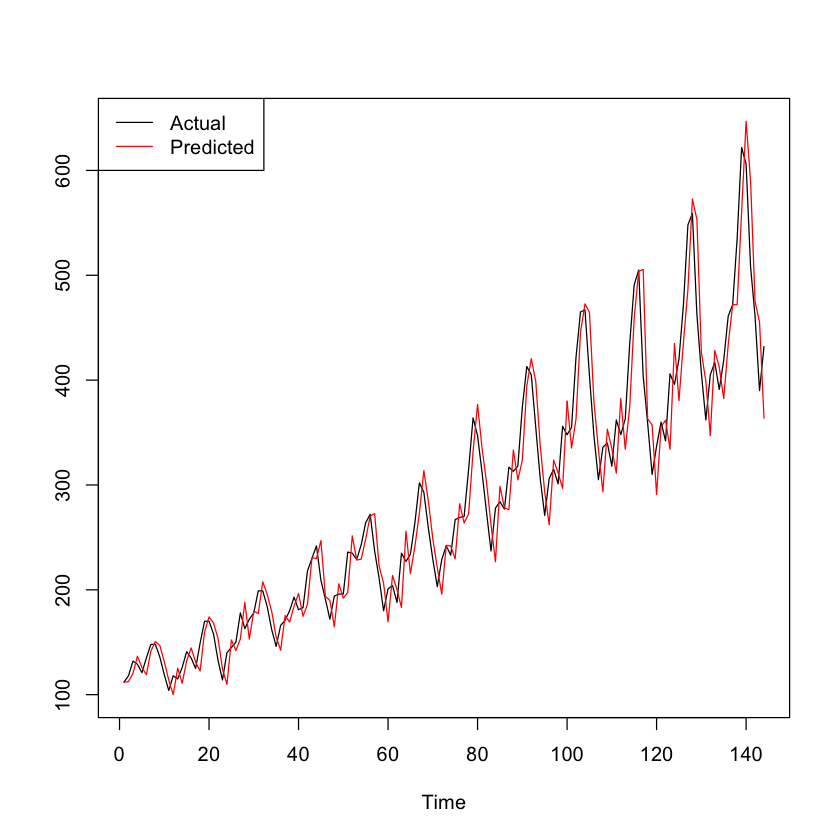

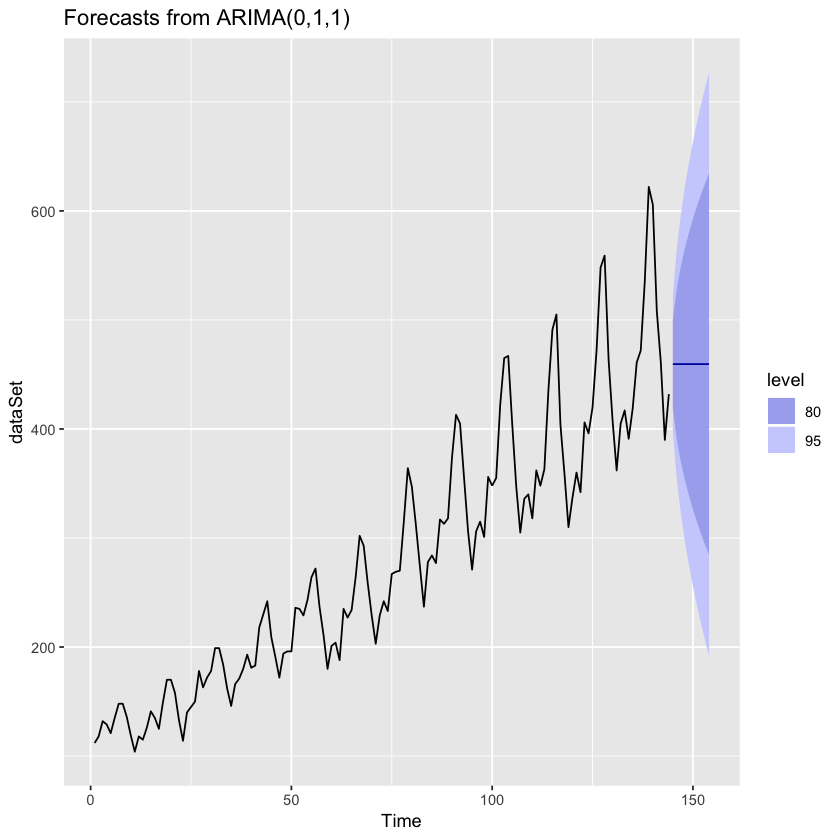

In [7]:
# ARIMA Model 
fit_arima  <- arima(dataSet,  order = c(0,1,1)); checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))